# COMMONLY USED DATA SCIENCE TOOLS, METHODS, AND TECHNOLOGIES

In [11]:
import mysql.connector
import configparser
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [12]:
config = configparser.ConfigParser()
config.read('My_SQL.ini')
try:
    mydb = mysql.connector.connect(
        host = config.get("My_SQL", "host"),
        port = config.get("My_SQL", "port"),
        user = config.get("My_SQL", "user"),
        password = config.get("My_SQL", "password"),
        database = config.get("My_SQL", "database"))
    cur = mydb.cursor(buffered=True)
    print("connected")
except:
    print("unable to connect")

connected


### Programming Languages

In [189]:
#querying the database to retrieve the required data and converting it into a dataframe
df_pl = pd.read_sql_query(
    """
    SELECT l.language, COUNT(k.respondent_id) AS Number_of_Respondents
    FROM kaggle_respondents_info k
    JOIN respondents_programming_languages r ON (r.respondent_id = k.respondent_id)
    JOIN programming_languages l ON (l.language_id = r.language_id)
    GROUP BY language
    ORDER BY Number_of_Respondents
    """, mydb)
df_pl

C:\Users\King Solo\AppData\Local\Temp\ipykernel_6108\4062507037.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_pl = pd.read_sql_query(


,language,Number_of_Respondents
0,None,256
1,Julia,296
2,Go,322
3,Other,1342
4,PHP,1443
5,C#,1473
6,Bash,1674
7,MATLAB,2441
8,Javascript,3489
9,C,3801


In [190]:
#removing the 'None' row
df_pl = df_pl.drop(index=[0])
df_pl.reset_index(inplace=True)

In [191]:
#adding a percentage column
total = df_pl['Number_of_Respondents'].sum()
pct = []
for i in range(df_pl.shape[0]):
    p = (df_pl['Number_of_Respondents'][i] / total) * 100
    pct.append(round(p, 2))
df_pl['percentages'] = pct

In [192]:
#Sorting in descending order
df_pl = df_pl.sort_values(by=['percentages'], ascending=False)
df_pl.reset_index(inplace=True)
del df_pl['index']

In [193]:
#Taking the first five and sorting them again in ascending order
df_pl = df_pl.head(5)
df_pl = df_pl.sort_values(by=['percentages'], ascending=True)
df_pl

,level_0,language,Number_of_Respondents,percentages
4,9,Java,3862,6.71
3,10,C++,4549,7.91
2,11,R,4571,7.94
1,12,SQL,9620,16.72
0,13,Python,18653,32.42


In [204]:
#function
def my_bar(my_xdata, my_ydata, my_label, my_pct, my_title):
    plt.figure(figsize=(5,5))
    colors_list = ["teal", "orange", "crimson", "orangered", "limegreen"]
    graph = plt.barh(my_xdata, my_ydata, color = colors_list, 
                    label = my_label)
    plt.title(my_title)
    plt.xticks(color = 'w')
    i = 4
    for p in graph:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        plt.text(x+width/1.0,
                 y+height*0.3,
                 str(my_pct[i])+'%', ha='left')
        i-=1
    plt.show()

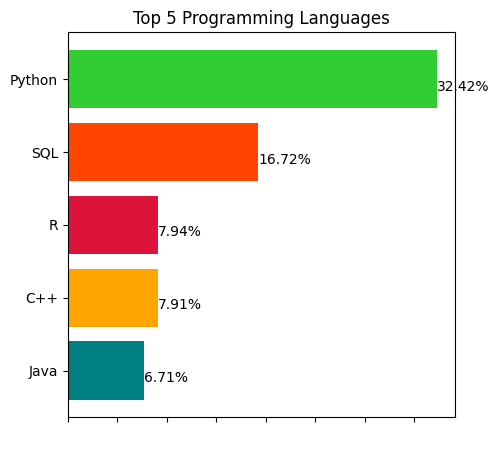

In [205]:
#Creating my chart
my_bar(df_pl['language'], df_pl['Number_of_Respondents'], df_pl['language'], 
       df_pl['percentages'], 'Top 5 Programming Languages')

### Intergrated Development Environments IDEs

In [182]:
#querying the database to retrieve the required data and converting it into a dataframe
df_ide = pd.read_sql_query(
    """
    SELECT i.IDE, COUNT(k.respondent_id) AS Number_of_Respondents
    FROM kaggle_respondents_info k
    JOIN respondents_IDEs r ON (r.respondent_id = k.respondent_id)
    JOIN IDEs i ON (i.IDE_id = r.IDE_id)
    GROUP BY IDE
    ORDER BY Number_of_Respondents
    """, mydb)
df_ide

C:\Users\King Solo\AppData\Local\Temp\ipykernel_6108\92769501.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_ide = pd.read_sql_query(


,IDE,Number_of_Respondents
0,None,409
1,Vim / Emacs,1448
2,Other,1474
3,IntelliJ,1612
4,Sublime Text,2218
5,MATLAB,2302
6,Spyder,2880
7,RStudio,3824
8,Notepad++,3891
9,Visual Studio,4416


In [183]:
#removing the 'None' row
df_ide = df_ide.drop(index=[0])
df_ide.reset_index(inplace=True)
del df_ide['index']

In [184]:
#adding a percentage column
total = df_ide['Number_of_Respondents'].sum()
pct = []
for i in range(df_ide.shape[0]):
    p = (df_ide['Number_of_Respondents'][i] / total) * 100
    pct.append(round(p, 2))
df_ide['percentages'] = pct

In [185]:
#Sorting in descending order
df_ide = df_ide.sort_values(by=['percentages'], ascending=False)
df_ide.reset_index(inplace=True)
del df_ide['index']

In [186]:
#Taking the first five and sorting them again in ascending order
df_ide = df_ide.head(5)
df_ide = df_ide.sort_values(by=['percentages'], ascending=True)
df_ide

,IDE,Number_of_Respondents,percentages
4,Visual Studio,4416,7.52
3,JupyterLab,4887,8.32
2,PyCharm,6099,10.39
1,Visual Studio Code (VSCode),9976,16.99
0,Jupyter Notebook,13684,23.31


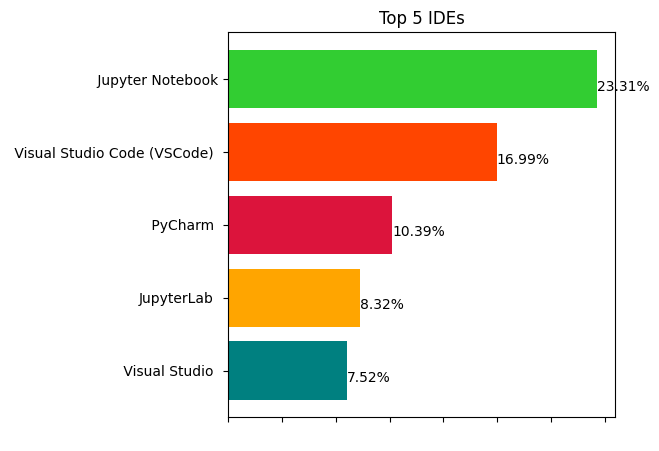

In [206]:
#Creating my chart
my_bar(df_ide['IDE'], df_ide['Number_of_Respondents'], df_ide['IDE'], 
       df_ide['percentages'], 'Top 5 IDEs')

### Data Visualization Libraries

In [215]:
#querying the database to retrieve the required data and converting it into a dataframe
df_d = pd.read_sql_query(
    """
    SELECT d.library, COUNT(k.respondent_id) AS Number_of_Respondents
    FROM kaggle_respondents_info k
    JOIN respondents_dataviz_libs r ON (r.respondent_id = k.respondent_id)
    JOIN dataviz_libs d ON (d.library_id = r.library_id)
    GROUP BY library
    ORDER BY Number_of_Respondents
    """, mydb)
df_d

C:\Users\King Solo\AppData\Local\Temp\ipykernel_6108\2558564854.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_d = pd.read_sql_query(


,library,Number_of_Respondents
0,Highcharter,198
1,Dygraphs,225
2,Altair,300
3,Pygal,318
4,Leaflet / Folium,554
5,Other,691
6,D3 js,734
7,Bokeh,771
8,Shiny,1043
9,Geoplotlib,1167


In [216]:
#removing the 'None' row
df_d = df_d.drop(index=[10])
df_d.reset_index(inplace=True)
del df_d['index']

In [217]:
#adding a percentage column
total = df_d['Number_of_Respondents'].sum()
pct = []
for i in range(df_d.shape[0]):
    p = (df_d['Number_of_Respondents'][i] / total) * 100
    pct.append(round(p, 2))
df_d['percentages'] = pct

In [218]:
#Sorting in descending order
df_d = df_d.sort_values(by=['percentages'], ascending=False)
df_d.reset_index(inplace=True)
del df_d['index']

In [219]:
#Taking the first five and sorting them again in ascending order
df_d = df_d.head(5)
df_d = df_d.sort_values(by=['percentages'], ascending=True)
df_d

,library,Number_of_Respondents,percentages
4,Geoplotlib,1167,2.94
3,Ggplot / ggplot2,4145,10.43
2,Plotly / Plotly Express,5078,12.78
1,Seaborn,10512,26.45
0,Matplotlib,14010,35.25


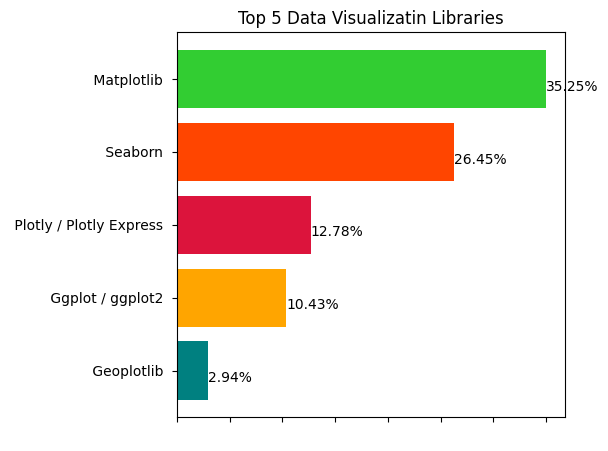

In [207]:
#Creating my chart
my_bar(df_d['library'], df_d['Number_of_Respondents'], df_d['library'], 
       df_d['percentages'], 'Top 5 Data Visualizatin Libraries')

### Data Products

In [208]:
#querying the database to retrieve the required data and converting it into a dataframe
df_pr = pd.read_sql_query(
    """
    SELECT d.data_product, COUNT(k.respondent_id) AS Number_of_Respondents
    FROM kaggle_respondents_info k
    JOIN respondents_data_products r ON (r.respondent_id = k.respondent_id)
    JOIN data_products d ON (d.data_product_id = r.data_product_id)
    GROUP BY data_product
    ORDER BY Number_of_Respondents
    """, mydb)
df_pr

C:\Users\King Solo\AppData\Local\Temp\ipykernel_6108\1744807332.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_pr = pd.read_sql_query(


,data_product,Number_of_Respondents
0,IBM Db2,192
1,Other,217
2,Amazon DynamoDB,356
3,Amazon Redshift,380
4,Snowflake,399
5,Google Cloud SQL,439
6,Amazon RDS,505
7,Microsoft Azure SQL Database,520
8,Oracle Database,688
9,Google Cloud BigQuery,690


In [209]:
#removing the 'None' row
df_pr = df_pr.drop(index=[10])
df_pr.reset_index(inplace=True)
del df_pr['index']

In [210]:
#adding a percentage column
total = df_pr['Number_of_Respondents'].sum()
pct = []
for i in range(df_pr.shape[0]):
    p = (df_pr['Number_of_Respondents'][i] / total) * 100
    pct.append(round(p, 2))
df_pr['percentages'] = pct

In [211]:
#Sorting in descending order
df_pr = df_pr.sort_values(by=['percentages'], ascending=False)
df_pr.reset_index(inplace=True)
del df_pr['index']

In [212]:
#Taking the first five and sorting them again in ascending order
df_pr = df_pr.head(5)
df_pr = df_pr.sort_values(by=['percentages'], ascending=True)
df_pr

,data_product,Number_of_Respondents,percentages
4,MongoDB,1031,8.94
3,SQLite,1159,10.05
2,Microsoft SQL Server,1203,10.44
1,PostgreSQL,1516,13.15
0,MySQL,2233,19.37


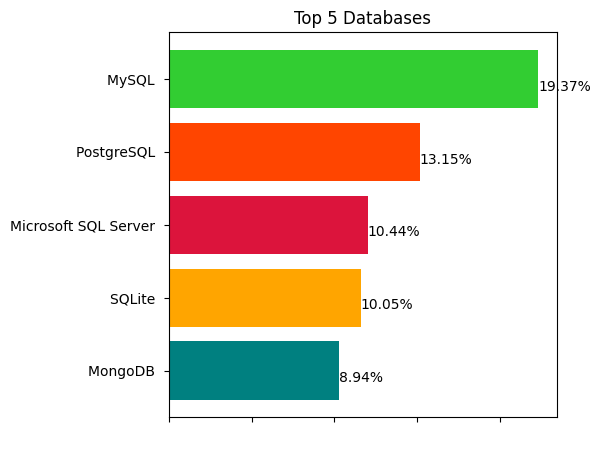

In [213]:
#Creating my chart
my_bar(df_pr['data_product'], df_pr['Number_of_Respondents'], df_pr['data_product'], 
       df_pr['percentages'], 'Top 5 Databases')

### Business Intelligence Tools

In [231]:
#querying the database to retrieve the required data and converting it into a dataframe
df_bi = pd.read_sql_query(
    """
    SELECT b.bi_tool, COUNT(k.respondent_id) AS Number_of_Respondents
    FROM kaggle_respondents_info k
    JOIN respondents_bi_tools r ON (r.respondent_id = k.respondent_id)
    JOIN bi_tools b ON (b.bi_id  = r.bi_id)
    GROUP BY bi_tool
    ORDER BY Number_of_Respondents
    """, mydb)
df_bi

C:\Users\King Solo\AppData\Local\Temp\ipykernel_6108\291087128.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_bi = pd.read_sql_query(


,bi_tool,Number_of_Respondents
0,Thoughtspot,22
1,Sisense,38
2,Domo,44
3,TIBCO Spotfire,86
4,SAP Analytics Cloud,106
5,Alteryx,132
6,Looker,166
7,Microsoft Azure Synapse,167
8,Other,191
9,Qlik Sense,207


In [232]:
#removing the 'None' row
df_bi = df_bi.drop(index=[14])
df_bi.reset_index(inplace=True)
del df_bi['index']

In [233]:
#adding a percentage column
total = df_bi['Number_of_Respondents'].sum()
pct = []
for i in range(df_bi.shape[0]):
    p = (df_bi['Number_of_Respondents'][i] / total) * 100
    pct.append(round(p, 2))
df_bi['percentages'] = pct

In [234]:
#Sorting in descending order
df_bi = df_bi.sort_values(by=['percentages'], ascending=False)
df_bi.reset_index(inplace=True)
del df_bi['index']

In [235]:
#Taking the first five and sorting them again in ascending order
df_bi = df_bi.head(5)
df_bi = df_bi.sort_values(by=['percentages'], ascending=True)
df_bi

,bi_tool,Number_of_Respondents,percentages
4,Qlik Sense,207,3.82
3,Amazon QuickSight,224,4.14
2,Google Data Studio,643,11.87
1,Microsoft Power BI,1658,30.61
0,Tableau,1732,31.98


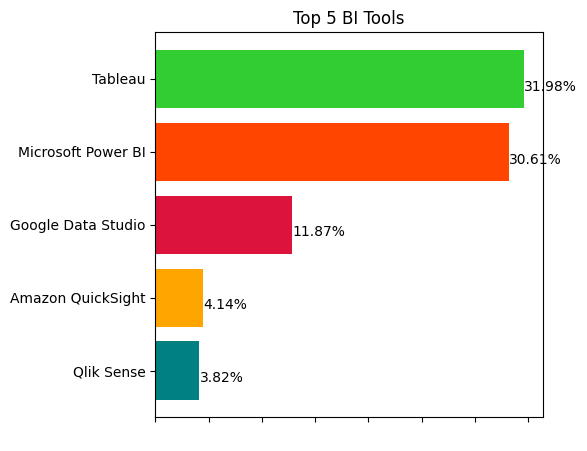

In [236]:
#Creating my chart
my_bar(df_bi['bi_tool'], df_bi['Number_of_Respondents'], df_bi['bi_tool'], 
       df_bi['percentages'], 'Top 5 BI Tools')

### Data Storage Products

In [253]:
#querying the database to retrieve the required data and converting it into a dataframe
df_ds = pd.read_sql_query(
    """
    SELECT d.data_store, COUNT(k.respondent_id) AS Number_of_Respondents
    FROM kaggle_respondents_info k
    JOIN respondents_data_stores r ON (r.respondent_id = k.respondent_id)
    JOIN data_stores d ON (d.store_id  = r.store_id)
    GROUP BY data_store
    ORDER BY Number_of_Respondents
    """, mydb)
df_ds

C:\Users\King Solo\AppData\Local\Temp\ipykernel_6108\3827470636.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_ds = pd.read_sql_query(


,data_store,Number_of_Respondents
0,Other,74
1,Amazon Elastic File System (EFS),447
2,Google Cloud Filestore,481
3,Microsoft Azure Files,511
4,Microsoft Azure Blob Storage,615
5,No / None,771
6,Google Cloud Storage (GCS),1288
7,Amazon Simple Storage Service (S3),1624


In [254]:
#removing the 'None' row
df_ds = df_ds.drop(index=[5])
df_ds.reset_index(inplace=True)
del df_ds['index']

In [255]:
#adding a percentage column
total = df_ds['Number_of_Respondents'].sum()
pct = []
for i in range(df_ds.shape[0]):
    p = (df_ds['Number_of_Respondents'][i] / total) * 100
    pct.append(round(p, 2))
df_ds['percentages'] = pct

In [256]:
#Sorting in descending order
df_ds = df_ds.sort_values(by=['percentages'], ascending=False)
df_ds.reset_index(inplace=True)
del df_ds['index']
df_ds = df_ds.head(5)

In [257]:
#function
def my_ba(my_xdata, my_ydata, my_label, my_pct, my_title, bbox):
    plt.figure(figsize=(8,5))
    colors_list = ["limegreen", "orangered", "orange", "teal", "deepskyblue", "yellow", "crimson"]
    graph = plt.bar(my_xdata, my_ydata, color = colors_list, 
                    label = my_label)
    plt.title(my_title)
    plt.xticks(color = 'w')


    i = 0
    for p in graph:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        plt.text(x+width/2,
                 y+height*1.01,
                 str(my_pct[i])+'%', ha='center')
        i+=1

    plt.legend(bbox_to_anchor=(bbox,1), loc='upper right')
    plt.show()

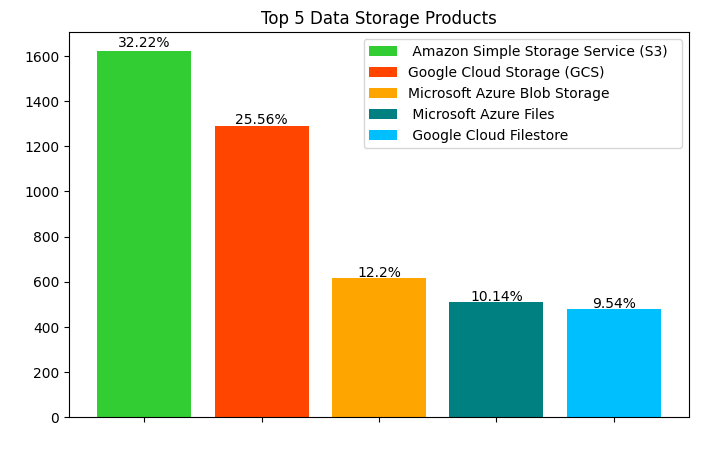

In [258]:
my_ba(df_ds['data_store'], df_ds['Number_of_Respondents'], df_ds['data_store'], 
      df_ds['percentages'], 'Top 5 Data Storage Products', 1.0)

### Cloud Computing Platforms

In [259]:
#querying the database to retrieve the required data and converting it into a dataframe
df_cp = pd.read_sql_query(
    """
    SELECT c.cloud_platform, COUNT(k.respondent_id) AS Number_of_Respondents
    FROM kaggle_respondents_info k
    JOIN respondents_cloud_platforms r ON (r.respondent_id = k.respondent_id)
    JOIN cloud_platforms c ON (c.cloud_id  = r.cloud_id)
    GROUP BY cloud_platform
    ORDER BY Number_of_Respondents
    """, mydb)
df_cp

C:\Users\King Solo\AppData\Local\Temp\ipykernel_6108\1181050657.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_cp = pd.read_sql_query(


,cloud_platform,Number_of_Respondents
0,Huawei Cloud,47
1,Tencent Cloud,56
2,Alibaba Cloud,76
3,SAP Cloud,107
4,VMware Cloud,155
5,Other,217
6,Oracle Cloud,230
7,IBM Cloud / Red Hat,287
8,None,1167
9,Microsoft Azure,1416


In [260]:
#removing the 'None' row
df_cp = df_cp.drop(index=[8])
df_cp.reset_index(inplace=True)
del df_cp['index']

In [261]:
#adding a percentage column
total = df_cp['Number_of_Respondents'].sum()
pct = []
for i in range(df_cp.shape[0]):
    p = (df_cp['Number_of_Respondents'][i] / total) * 100
    pct.append(round(p, 2))
df_cp['percentages'] = pct

In [262]:
#Sorting in descending order
df_cp = df_cp.sort_values(by=['percentages'], ascending=False)
df_cp.reset_index(inplace=True)
del df_cp['index']
df_cp = df_cp.head(5)

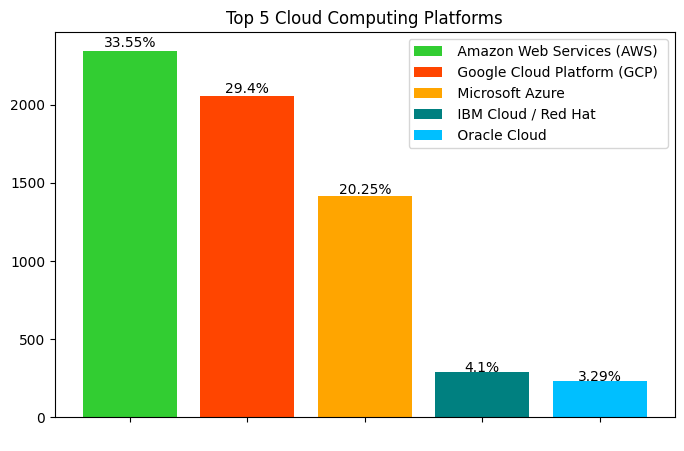

In [263]:
my_ba(df_cp['cloud_platform'], df_cp['Number_of_Respondents'], df_cp['cloud_platform'], 
      df_cp['percentages'], 'Top 5 Cloud Computing Platforms', 1.0)

### Computer Vision Methods

In [276]:
#querying the database to retrieve the required data and converting it into a dataframe
df_cv = pd.read_sql_query(
    """
    SELECT c.cv_method, COUNT(k.respondent_id) AS Number_of_Respondents
    FROM kaggle_respondents_info k
    JOIN respondents_cv_methods r ON (r.respondent_id = k.respondent_id)
    JOIN cv_methods c ON (c.cv_id = r.cv_id)
    GROUP BY cv_method
    ORDER BY Number_of_Respondents
    """, mydb)
df_cv

C:\Users\King Solo\AppData\Local\Temp\ipykernel_6108\392077702.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_cv = pd.read_sql_query(


,cv_method,Number_of_Respondents
0,Other,146
1,"Vision transformer networks (ViT, DeiT, BiT, B...",782
2,"Generative Networks (GAN, VAE, etc)",1343
3,None,1455
4,"General purpose image/video tools (PIL, cv2, s...",2293
5,"Image segmentation methods (U-Net, Mask R-CNN,...",2495
6,"Object detection methods (YOLOv6, RetinaNet, etc)",2525
7,Image classification and other general purpose...,3664


In [278]:
#shortening data in index 5
df_cv.at[7,'cv_method']='Image classification and other general purpose networks'

In [279]:
#removing the 'None' row
df_cv = df_cv.drop(index=[3])
df_cv.reset_index(inplace=True)
del df_cv['index']

In [280]:
#adding a percentage column
total = df_cv['Number_of_Respondents'].sum()
pct = []
for i in range(df_cv.shape[0]):
    p = (df_cv['Number_of_Respondents'][i] / total) * 100
    pct.append(round(p, 2))
df_cv['percentages'] = pct

In [281]:
#Sorting in descending order
df_cv = df_cv.sort_values(by=['percentages'], ascending=False)
df_cv.reset_index(inplace=True)
del df_cv['index']
df_cv = df_cv.head(5)

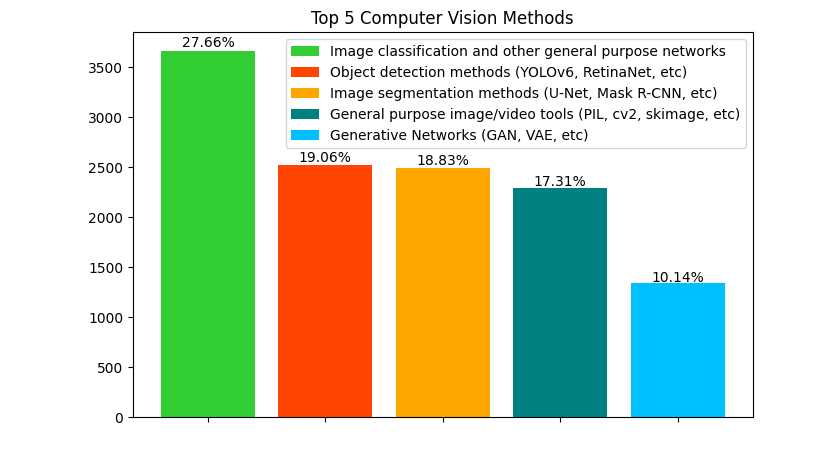

In [285]:
my_ba(df_cv['cv_method'], df_cv['Number_of_Respondents'], df_cv['cv_method'], 
      df_cv['percentages'], 'Top 5 Computer Vision Methods', 1.0)

### Machine Learning Algorithms

In [293]:
#querying the database to retrieve the required data and converting it into a dataframe
df_al = pd.read_sql_query(
    """
    SELECT m.algorithm, COUNT(k.respondent_id) AS Number_of_Respondents
    FROM kaggle_respondents_info k
    JOIN respondents_ml_algo r ON (r.respondent_id = k.respondent_id)
    JOIN ml_algo m ON (m.algorithm_id = r.algorithm_id)
    GROUP BY algorithm
    ORDER BY Number_of_Respondents
    """, mydb)
df_al

C:\Users\King Solo\AppData\Local\Temp\ipykernel_6108\236412479.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_al = pd.read_sql_query(


,algorithm,Number_of_Respondents
0,Other,538
1,Evolutionary Approaches,823
2,Generative Adversarial Networks,1166
3,"Autoencoder Networks (DAE, VAE, etc)",1234
4,None,1326
5,Graph Neural Networks,1422
6,"Transformer Networks (BERT, gpt-3, etc)",2196
7,Recurrent Neural Networks,3451
8,"Dense Neural Networks (MLPs, etc)",3476
9,Bayesian Approaches,3661


In [294]:
#shortening data in index 10
df_al.at[10,'algorithm']='Gradient Boosting Machines'

In [295]:
#removing the 'None' row
df_al = df_al.drop(index=[4])
df_al.reset_index(inplace=True)
del df_al['index']

In [296]:
#adding a percentage column
total = df_al['Number_of_Respondents'].sum()
pct = []
for i in range(df_al.shape[0]):
    p = (df_al['Number_of_Respondents'][i] / total) * 100
    pct.append(round(p, 2))
df_al['percentages'] = pct

In [297]:
#Sorting in descending order
df_al = df_al.sort_values(by=['percentages'], ascending=False)
df_al.reset_index(inplace=True)
del df_al['index']
df_al = df_al.head(5)

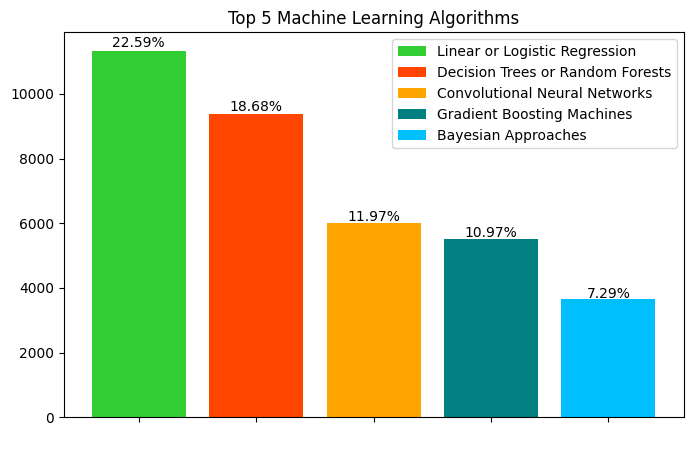

In [306]:
my_ba(df_al['algorithm'], df_al['Number_of_Respondents'], df_al['algorithm'], 
      df_al['percentages'], 'Top 5 Machine Learning Algorithms', 1.0)

### Machine Learning Frameworks

In [300]:
#querying the database to retrieve the required data and converting it into a dataframe
df_ml = pd.read_sql_query(
    """
    SELECT m.framework, COUNT(k.respondent_id) AS Number_of_Respondents
    FROM kaggle_respondents_info k
    JOIN respondents_ml_frameworks r ON (r.respondent_id = k.respondent_id)
    JOIN ml_frameworks m ON (m.framework_id = r.framework_id)
    GROUP BY framework
    ORDER BY Number_of_Respondents
    """, mydb)
df_ml

C:\Users\King Solo\AppData\Local\Temp\ipykernel_6108\447251666.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_ml = pd.read_sql_query(


,framework,Number_of_Respondents
0,JAX,252
1,Tidymodels,547
2,Other,620
3,Fast.ai,648
4,Caret,821
5,PyTorch Lightning,1013
6,CatBoost,1165
7,Huggingface,1332
8,None,1709
9,LightGBM,1940


In [301]:
#removing the 'None' row
df_ml = df_ml.drop(index=[8])
df_ml.reset_index(inplace=True)
del df_ml['index']

In [302]:
#adding a percentage column
total = df_ml['Number_of_Respondents'].sum()
pct = []
for i in range(df_ml.shape[0]):
    p = (df_ml['Number_of_Respondents'][i] / total) * 100
    pct.append(round(p, 2))
df_ml['percentages'] = pct

In [303]:
#Sorting in descending order
df_ml = df_ml.sort_values(by=['percentages'], ascending=False)
df_ml.reset_index(inplace=True)
del df_ml['index']
df_ml = df_ml.head(5)

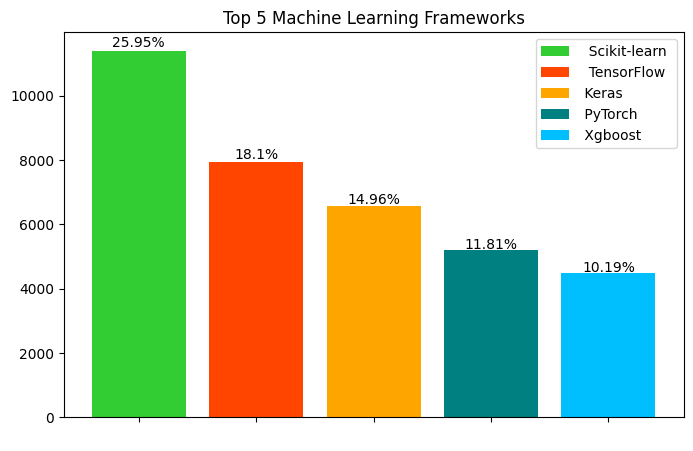

In [305]:
my_ba(df_ml['framework'], df_ml['Number_of_Respondents'], df_ml['framework'], 
      df_ml['percentages'], 'Top 5 Machine Learning Frameworks', 1.0)

In [307]:
mydb.close()
cur.close()

True